In [12]:
import os
import pandas as pd

BASE_DIR = r"D:\Deep Learning Project\Preprocessing\Doctor’s Handwritten Prescription BD dataset"

image_exts = {".png", ".jpg", ".jpeg", ".bmp", ".tiff"}

print("====== DATASET SUMMARY (PER SUBFOLDER) ======\n")

for subfolder in os.listdir(BASE_DIR):
    sub_path = os.path.join(BASE_DIR, subfolder)

    if not os.path.isdir(sub_path):
        continue

    image_count = 0
    csv_rows = 0

    for root, _, files in os.walk(sub_path):
        for file in files:
            ext = os.path.splitext(file.lower())[1]

            # count images
            if ext in image_exts:
                image_count += 1

            # count csv rows
            elif ext == ".csv":
                csv_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(csv_path)
                    csv_rows += len(df)
                except Exception as e:
                    print(f"Error reading CSV in {subfolder}: {file}")

    print(f"Folder: {subfolder}")
    print(f"  Images   : {image_count}")
    print(f"  CSV rows : {csv_rows}\n")


====== DATASET SUMMARY (PER SUBFOLDER) ======

Folder: Testing
  Images   : 780
  CSV rows : 780

Folder: Training
  Images   : 3120
  CSV rows : 3120

Folder: Validation
  Images   : 780
  CSV rows : 780



In [13]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import cv2
import numpy as np

def preprocess_image(img_path, target_h=64, max_w=256):
    
    data = np.fromfile(img_path, dtype=np.uint8)
    img = cv2.imdecode(data, cv2.IMREAD_COLOR)

    if img is None:
        raise FileNotFoundError(f"OpenCV failed to decode image: {img_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, bin_img = cv2.threshold(
        gray, 0, 255,
        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    kernel = np.ones((2, 2), np.uint8)
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)

    h, w = bin_img.shape
    scale = target_h / h
    new_w = min(int(w * scale), max_w)
    resized = cv2.resize(bin_img, (new_w, target_h))

    padded = np.zeros((target_h, max_w), dtype=np.uint8)
    padded[:, :new_w] = resized

    return padded


In [15]:
import os
import pandas as pd
import random

BASE_DIR = r"D:\Deep Learning Project\Preprocessing\Doctor’s Handwritten Prescription BD dataset"
FOLDER = "Training"

folder_path = os.path.join(BASE_DIR, FOLDER)

# find csv
csv_file = [f for f in os.listdir(folder_path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(folder_path, csv_file))

images_dir = os.path.join(folder_path, "training_words")

# sample 50 rows
samples = df.sample(50, random_state=42)


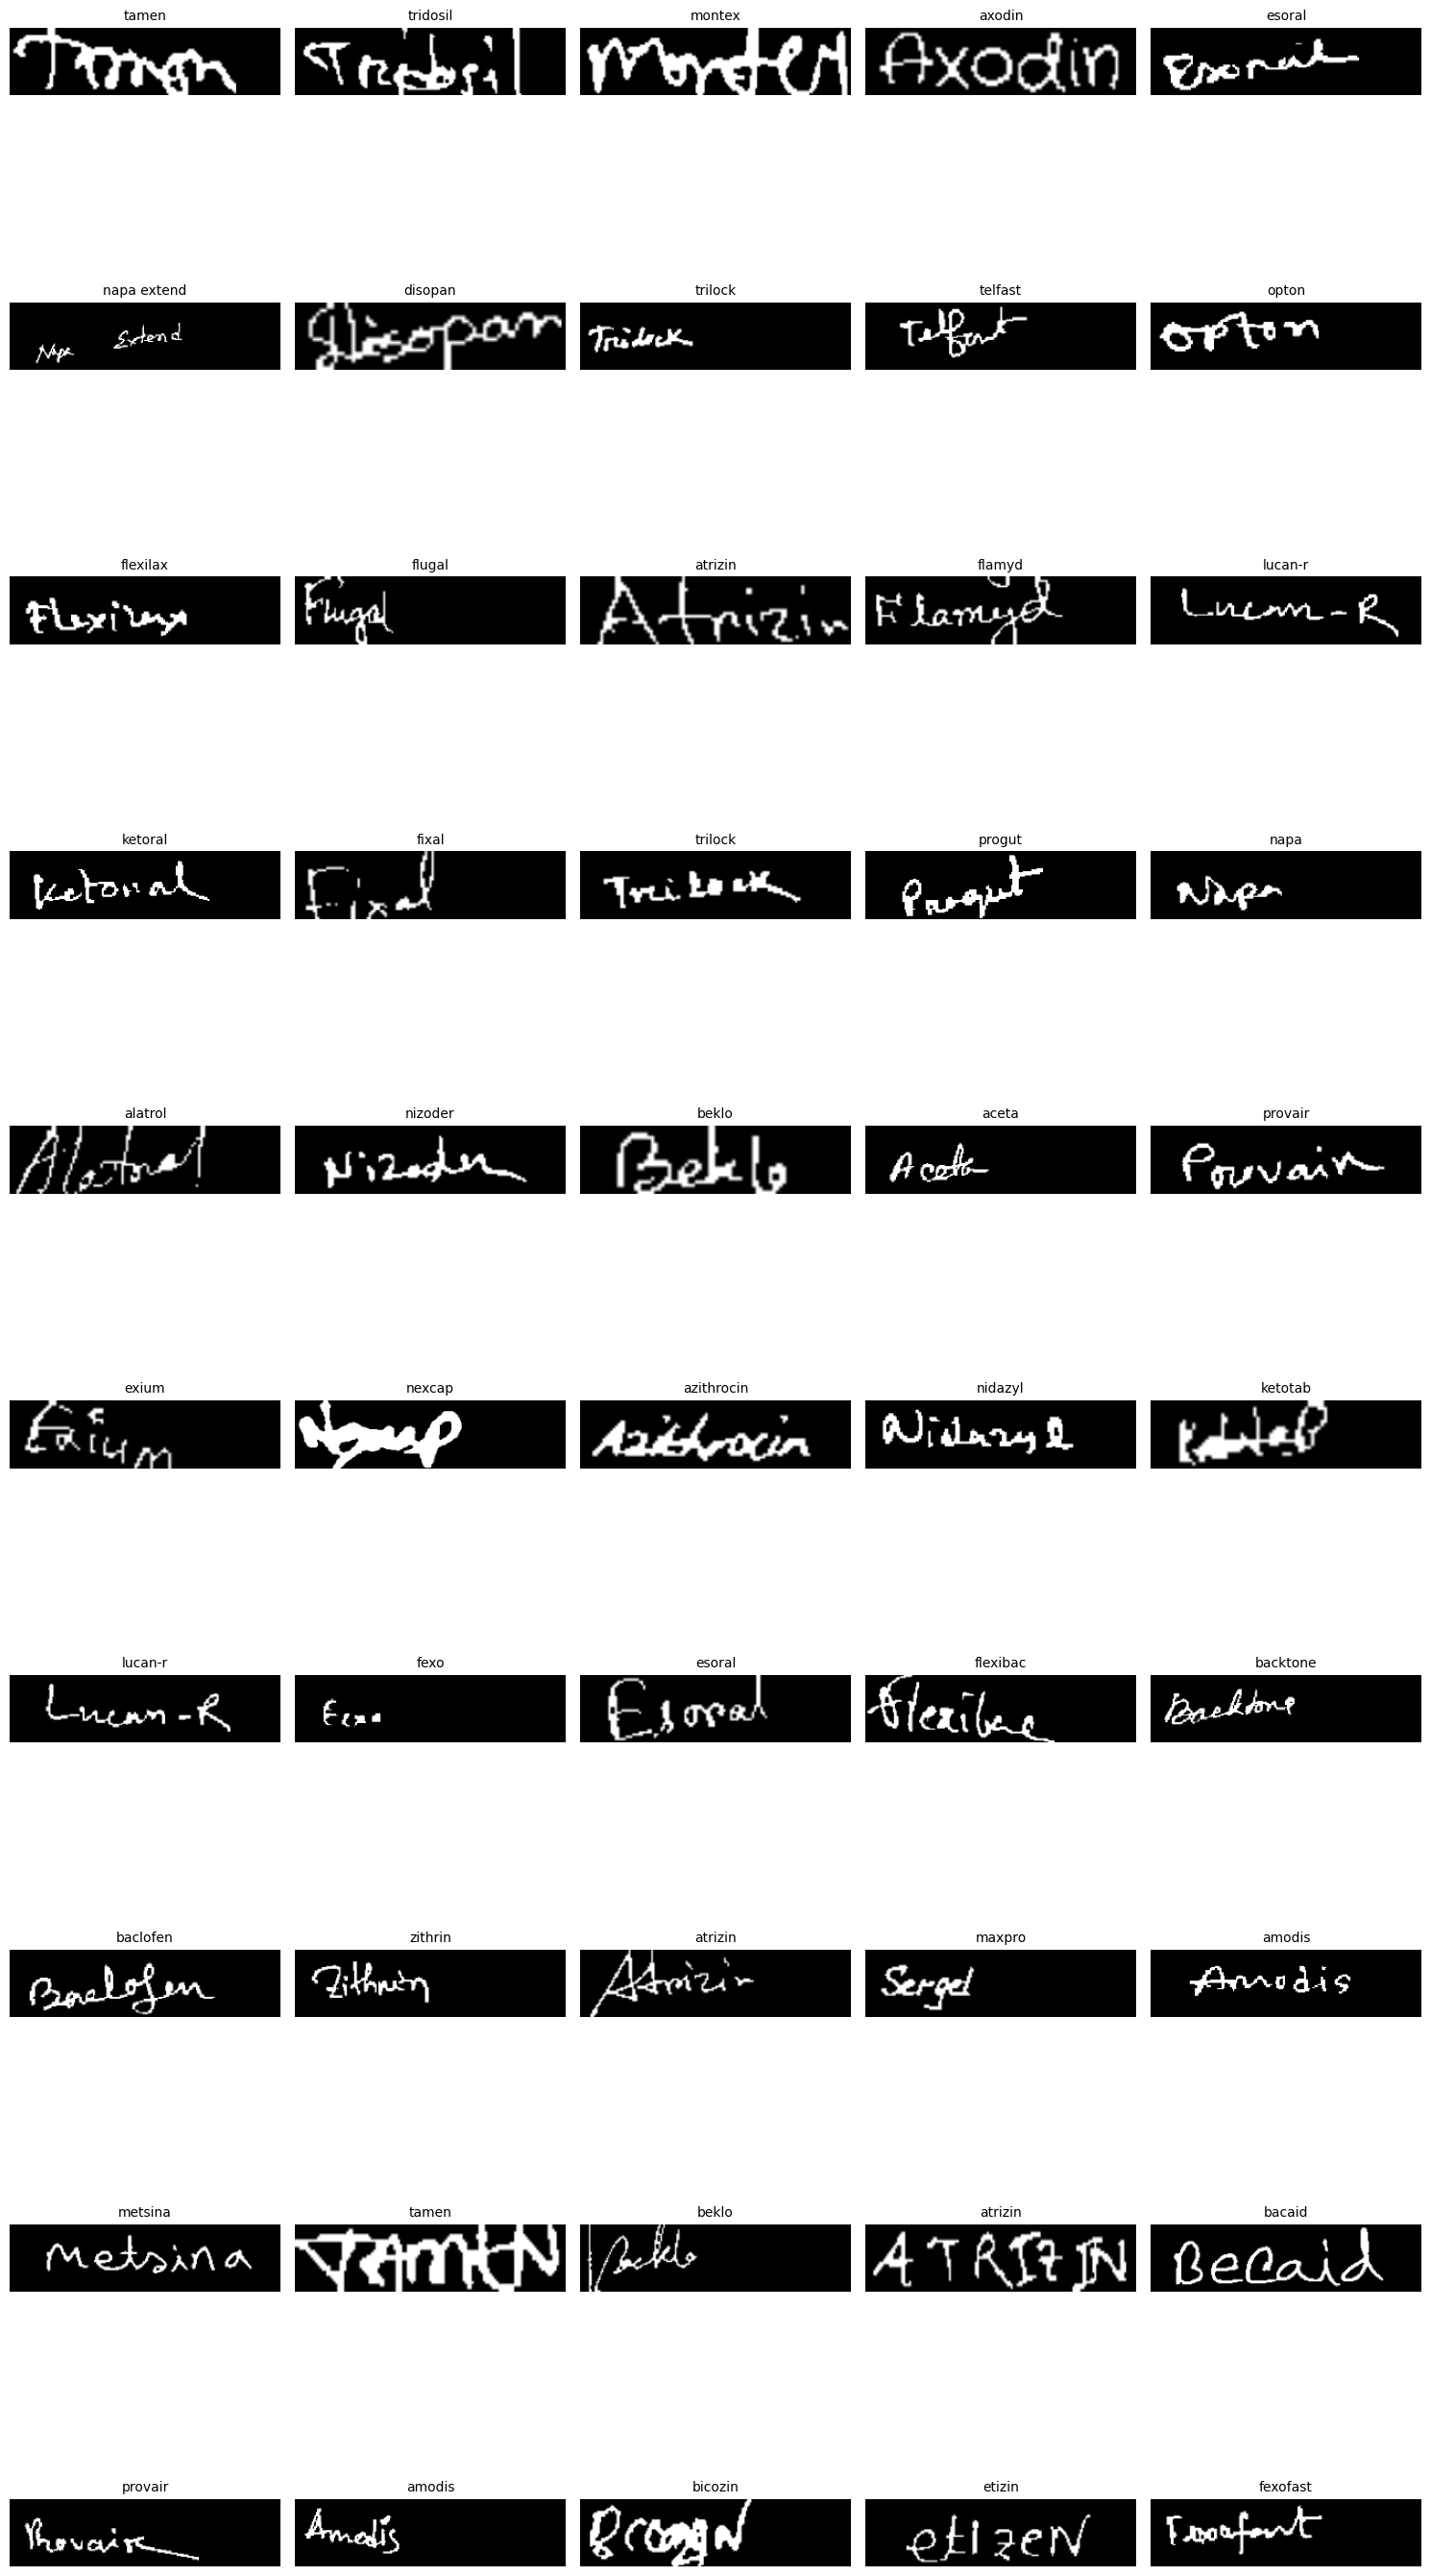

In [21]:
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(15, 30))

for i, (_, row) in enumerate(samples.iterrows()):
    if i == 50:
        break

    img_path = os.path.join(images_dir, row["IMAGE"])
    label = str(row["MEDICINE_NAME"]).lower().strip()

    if not os.path.exists(img_path):
        print("Missing image:", img_path)
        continue

    proc_img = preprocess_image(img_path)

    plt.subplot(10, 5, i + 1)
    plt.imshow(proc_img, cmap="gray")
    plt.title(label, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()
